In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
ratings_header = "UserID::MovieID::Ratings::Timestamp".split('::')
users_header = "UserID::Gender::Age::Occupation::Zip-code".split('::')
movies_header = "MovieID::Title::Genres".split('::')

In [3]:
ratings = pd.read_csv("C:/Users/HP/Desktop/ratings.dat", sep='::', names=ratings_header)
users = pd.read_csv("C:/Users/HP/Desktop/users.dat", sep='::', names=users_header)
movies = pd.read_csv("C:/Users/HP/Desktop/movies.dat", sep='::', names=movies_header)


<ipython-input-3-038a3e7bb20d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("C:/Users/HP/Desktop/ratings.dat", sep='::', names=ratings_header)
<ipython-input-3-038a3e7bb20d>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("C:/Users/HP/Desktop/users.dat", sep='::', names=users_header)
<ipython-input-3-038a3e7bb20d>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mov

In [4]:
movies_and_ratings = pd.merge(movies, ratings, on='MovieID')
Master_Data = pd.merge(users, movies_and_ratings, on='UserID')
Master_Data.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Title         0
Genres        0
Ratings       0
Timestamp     0
dtype: int64

In [5]:
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Ratings,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


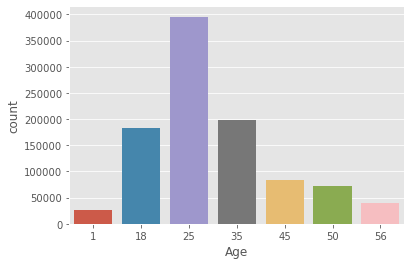

In [6]:
plot = sns.countplot(x='Age', data=Master_Data)

The above plot shows that people between 18 and 35 age group watch the most movies 

In [7]:
toy_story = Master_Data[Master_Data['Title'].str.contains('Toy Story')==True]
toy_story.groupby(['Title', 'Ratings']).size()

Title               Ratings
Toy Story (1995)    1           16
                    2           61
                    3          345
                    4          835
                    5          820
Toy Story 2 (1999)  1           25
                    2           44
                    3          214
                    4          578
                    5          724
dtype: int64

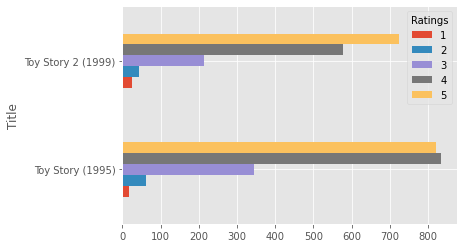

In [8]:
toy_story.groupby(['Title','Ratings']).size().unstack().plot(kind='barh', legend=True);

From the above plot, we can infer that people liked Toy Story (1995) more than the 1999 one

In [9]:
Top_25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
Top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

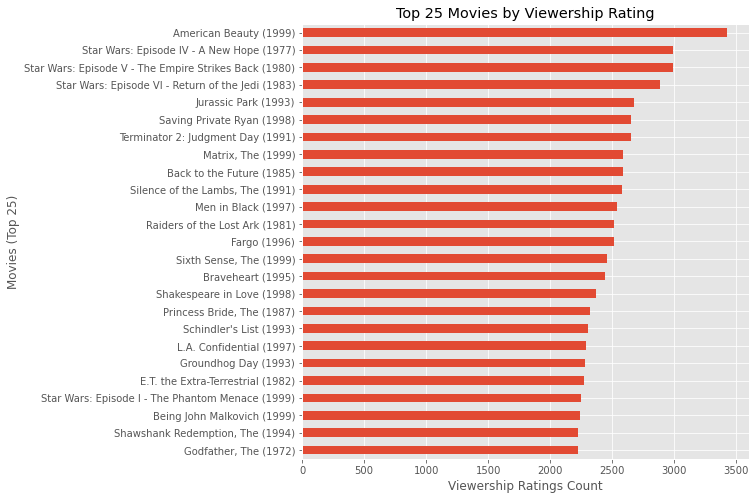

In [10]:
Top_25 = Top_25.sort_values()
Top_25.plot(kind='barh',figsize=(8,8))
plt.xlabel('Viewership Ratings Count')
plt.ylabel('Movies (Top 25)')
plt.title('Top 25 Movies by Viewership Rating');

The above plot shows that American Beauty (1999) is rated for several times

In [11]:
Master_Data[Master_Data['UserID']==2696][['UserID', 'Title', 'Ratings']]

,UserID,Title,Ratings
440667,2696,"Client, The (1994)",3
440668,2696,Lone Star (1996),5
440669,2696,Basic Instinct (1992),4
440670,2696,E.T. the Extra-Terrestrial (1982),3
440671,2696,"Shining, The (1980)",4
440672,2696,Back to the Future (1985),2
440673,2696,Cop Land (1997),3
440674,2696,L.A. Confidential (1997),4
440675,2696,"Game, The (1997)",4
440676,2696,I Know What You Did Last Summer (1997),2


In [12]:
Genres = Master_Data['Genres'].str.split("|")
Genres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                           [Drama, Film-Noir]
1000205                             [Action, Sci-Fi]
1000206                               [Crime, Drama]
1000207              [Animation, Children's, Comedy]
1000208                                     [Comedy]
Name: Genres, Length: 1000209, dtype: object

In [13]:
list_Genres = set()
for genre in Genres:
    list_Genres = list_Genres.union(set(genre))

ratingsOneHot = Master_Data['Genres'].str.get_dummies("|")
Master_Data = pd.concat([Master_Data,ratingsOneHot], axis=1)
Master_Data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Ratings,Timestamp,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268,...,0,0,0,0,0,0,0,0,0,0
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351,...,0,0,0,1,0,1,0,0,0,0
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777,...,0,0,0,0,0,0,0,0,0,0
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760,...,1,0,0,0,0,0,1,0,0,0
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,3683,Blood Simple (1984),Drama|Film-Noir,4,960971696,...,0,1,0,0,0,0,0,0,0,0
1000205,6040,M,25,6,11106,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi,4,964828575,...,0,0,0,0,0,0,1,0,0,0
1000206,6040,M,25,6,11106,3735,Serpico (1973),Crime|Drama,4,960971654,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,M,25,6,11106,3751,Chicken Run (2000),Animation|Children's|Comedy,4,964828782,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Master_Data.dtypes

UserID          int64
Gender         object
Age             int64
Occupation      int64
Zip-code       object
MovieID         int64
Title          object
Genres         object
Ratings         int64
Timestamp       int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [15]:
for column in Master_Data.columns:
     print("\n" + column)
     print(Master_Data[column].value_counts())


UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64

Gender
M    753769
F    246440
Name: Gender, dtype: int64

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

Zip-code
94110    3802
60640    3430
98103    3204
95616    3079
02138    3019
         ... 
36102      20
89185      20
46556      20
13021      20
43612      20
Name: Zip-code, Length: 3439, dtype: int64

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624   

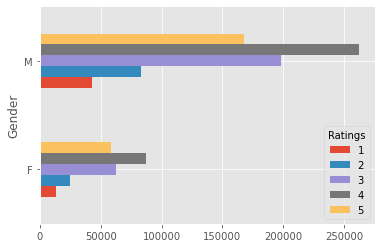

In [16]:
Master_Data.groupby(['Gender','Ratings']).size().unstack().plot(kind='barh');

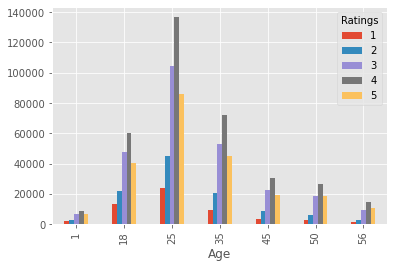

In [17]:
Master_Data.groupby(['Age','Ratings']).size().unstack().plot(kind='bar');

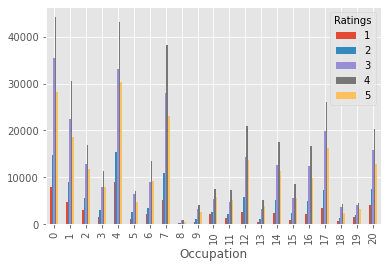

In [18]:
Master_Data.groupby(['Occupation','Ratings']).size().unstack().plot(kind='bar');

In [19]:
le = LabelEncoder()
Master_Data_obj = Master_Data.select_dtypes(include='object').columns
for i in Master_Data_obj:
    Master_Data[i] = le.fit_transform(Master_Data[i])

In [20]:
features = Master_Data.drop('Ratings', axis=1)
label = Master_Data['Ratings']
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=7) 

In [21]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

0.921065642823666